### **LSTM model on Binance Coin price data**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 50)           

C:\Users\sahmed\AppData\Local\Temp\ipykernel_7356\3337628157.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  past_bnb_df = past.append(bnb_test, ignore_index=True)


18/18 [==============================] - 2s 21ms/step


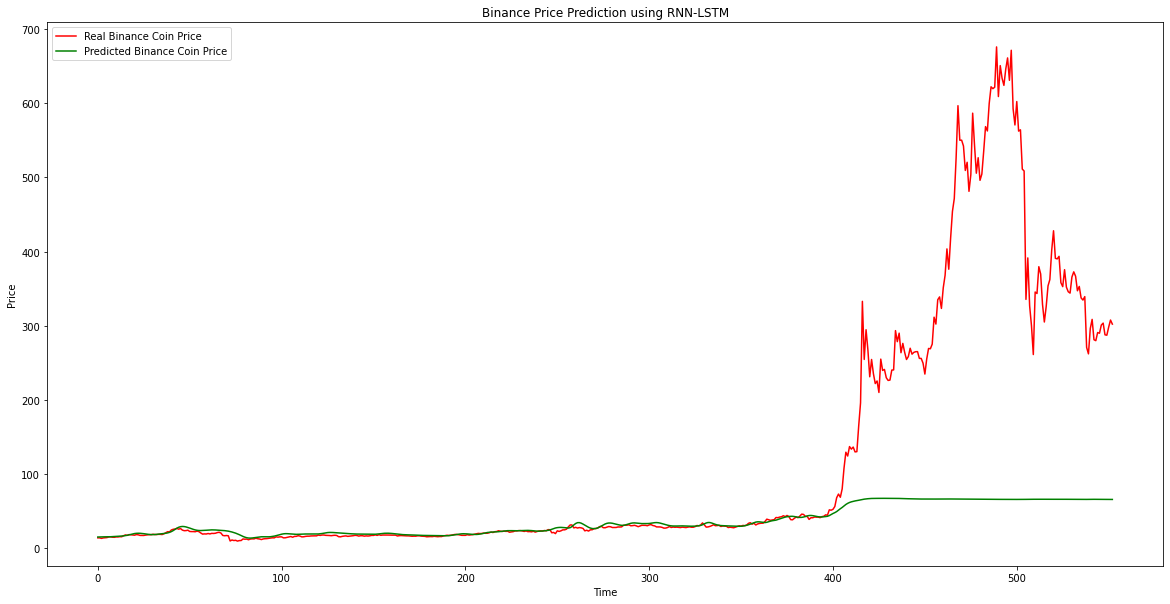

Mean Squared Error (MSE):  34630.829453045444
Mean Absolute Error (MAE):  101.03605903672643
Root Mean Squared Error (RMSE):  186.09360400896492
R-squared (R2):  -680.2064606684288
Correlation:  0.8559159097857748


In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

# Load the dataset
data = pd.read_csv('coin_BinanceCoin.csv')

# Filter for Binance Coin data only
bnb = data[data['Name']=='Binance Coin'].copy()

# Split data into training and test sets
bnb_train = bnb[bnb['Date']<'2020-01-01'].copy()
bnb_test = bnb[bnb['Date']>='2020-01-01'].copy()

# Filter for Open, Close, High, Low, and Volume columns for the training 
training_bnb = bnb_train[['Open', 'Close', 'High', 'Low', 'Volume']].copy()

# Normalize the training set
scaler = MinMaxScaler()
training_bnb = scaler.fit_transform(training_bnb)

# Create input and output sequences for the LSTM model
X_train = []
Y_train = []
for i in range(60, len(training_bnb)):
  X_train.append(training_bnb[i-60:i])
  Y_train.append(training_bnb[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the LSTM model
model.fit(X_train, Y_train, epochs = 30, batch_size =50)

# Create input and output sequences for testing the model
past = bnb_train.tail(60)
past_bnb_df = past.append(bnb_test, ignore_index=True)
testing_bnb = past_bnb_df[['Open', 'Close', 'High', 'Low', 'Volume']].copy()
testing_bnb = scaler.transform(testing_bnb)
X_test = []
Y_test = []
for i in range(60, len(testing_bnb)):
  X_test.append(testing_bnb[i-60:i])
  Y_test.append(testing_bnb[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)

# Make predictions using the LSTM model
Y_pred = model.predict(X_test)

# Rescale the predicted and actual prices
scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

# Plot the predicted and actual prices
plt.figure(figsize=(20,10))
plt.plot(Y_test, color = 'red', label = 'Real Binance Coin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Binance Coin Price')
plt.title('Binance Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate metrics
mse = np.mean((Y_pred - Y_test)**2)
mae = np.mean(np.abs(Y_pred - Y_test))
rmse = np.sqrt(mse)
r2 = 1 - np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2)

# Print metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)

# Calculate correlation between predicted and actual prices
corr = np.corrcoef(Y_pred.reshape(-1), Y_test.reshape(-1))[0][1]

# Print correlation
print("Correlation: ", corr)

### **LSTM model on Bitcoin Coin price data**

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_12 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 50)           

C:\Users\sahmed\AppData\Local\Temp\ipykernel_7356\402116137.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  past_btc_df = past.append(btc_test, ignore_index=True)


31/31 [==============================] - 2s 21ms/step


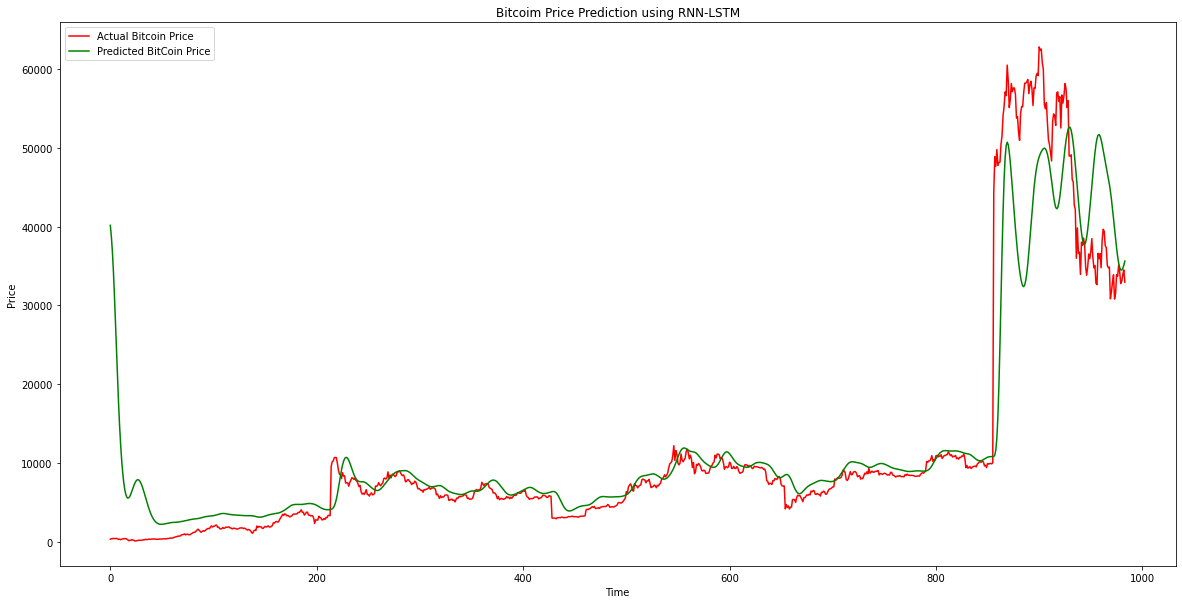

Mean Squared Error (MSE):  372390933.6073368
Mean Absolute Error (MAE):  11564.198020549813
Root Mean Squared Error (RMSE):  19297.433342476837
R-squared (R2):  -1710.608690459444
Correlation:  0.9135376288033761


In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

# Load the dataset
data = pd.read_csv('coin_Bitcoin.csv')

# Filter for Binance Coin data only
btc = data[data['Name']=='Bitcoin'].copy()

# Split data into training and test sets
btc_train = btc[btc['Date']<'2020-01-01'].copy()
btc_test = btc[btc['Date']>='2020-01-01'].copy()

# Filter for Open, Close, High, Low, and Volume columns for the training 
training_btc = btc_train[['Open', 'Close', 'High', 'Low', 'Volume']].copy()

# Normalize the training set
scaler = MinMaxScaler()
training_btc = scaler.fit_transform(training_btc)

# Create input and output sequences for the LSTM model
X_train = []
Y_train = []
for i in range(60, len(training_btc)):
  X_train.append(training_btc[i-60:i])
  Y_train.append(training_btc[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the LSTM model
model.fit(X_train, Y_train, epochs = 30, batch_size =50)

# Create input and output sequences for testing the model
past = btc_train.tail(60)
past_btc_df = past.append(btc_test, ignore_index=True)
testing_btc = past_btc_df[['Open', 'Close', 'High', 'Low', 'Volume']].copy()
testing_btc = scaler.transform(testing_btc)
X_test = []
Y_test = []
for i in range(60, len(testing_btc)):
  X_test.append(testing_btc[i-60:i])
  Y_test.append(testing_btc[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)

# Make predictions using the LSTM model
Y_pred = model.predict(X_test)

# Rescale the predicted and actual prices
scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

# Plot the predicted and actual prices
plt.figure(figsize=(20,10))
plt.plot(Y_test, color = 'red', label = 'Actual Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted BitCoin Price')
plt.title('Bitcoim Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate metrics
mse = np.mean((Y_pred - Y_test)**2)
mae = np.mean(np.abs(Y_pred - Y_test))
rmse = np.sqrt(mse)
r2 = 1 - np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2)

# Print metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)

# Calculate correlation between predicted and actual prices
corr = np.corrcoef(Y_pred.reshape(-1), Y_test.reshape(-1))[0][1]

# Print correlation
print("Correlation: ", corr)

### **LSTM model on Cardano Coin price data**

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_16 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_17 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_18 (LSTM)              (None, 60, 50)           

C:\Users\sahmed\AppData\Local\Temp\ipykernel_7356\3998791544.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  past_ada_df = past.append(ada_test, ignore_index=True)


18/18 [==============================] - 2s 29ms/step


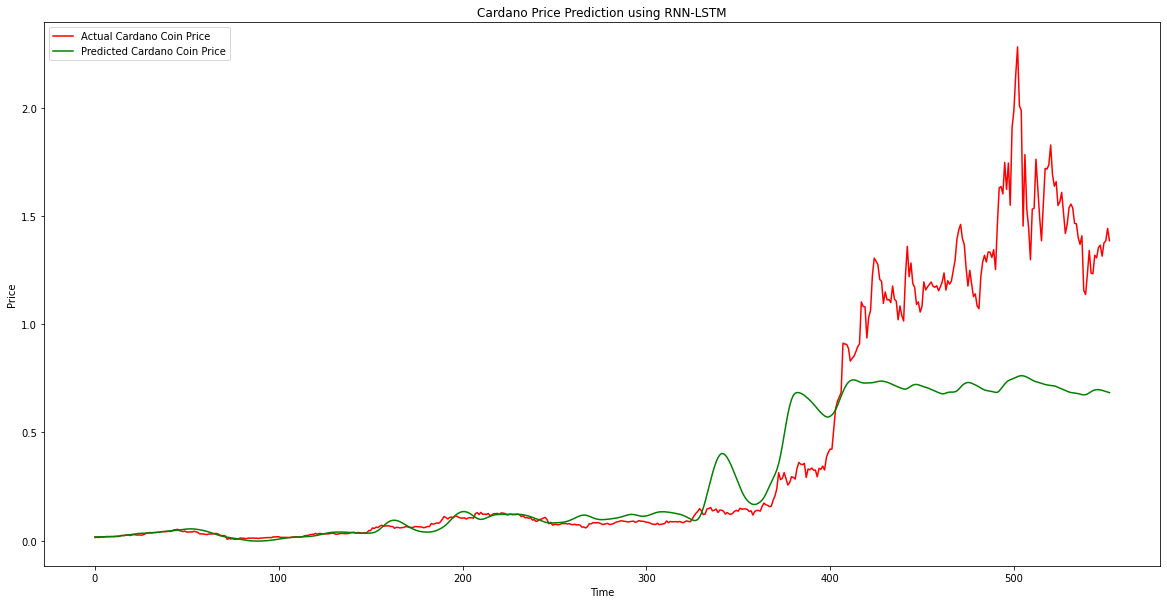

Mean Squared Error (MSE):  0.42285125572385696
Mean Absolute Error (MAE):  0.45933379573150085
Root Mean Squared Error (RMSE):  0.6502701405753281
R-squared (R2):  -731.3843248874965
Correlation:  0.9063558310604425


In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

# Load the dataset
data = pd.read_csv('coin_Cardano.csv')

# Filter for Binance Coin data only
ada = data[data['Name']=='Cardano'].copy()

# Split data into training and test sets
ada_train = ada[ada['Date']<'2020-01-01'].copy()
ada_test = ada[ada['Date']>='2020-01-01'].copy()

# Filter for Open, Close, High, Low, and Volume columns for the training 
training_ada = ada_train[['Open', 'Close', 'High', 'Low', 'Volume']].copy()

# Normalize the training set
scaler = MinMaxScaler()
training_ada = scaler.fit_transform(training_ada)

# Create input and output sequences for the LSTM model
X_train = []
Y_train = []
for i in range(60, len(training_ada)):
  X_train.append(training_ada[i-60:i])
  Y_train.append(training_ada[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the LSTM model
model.fit(X_train, Y_train, epochs = 30, batch_size =50)

# Create input and output sequences for testing the model
past = ada_train.tail(60)
past_ada_df = past.append(ada_test, ignore_index=True)
testing_ada = past_ada_df[['Open', 'Close', 'High', 'Low', 'Volume']].copy()
testing_ada = scaler.transform(testing_ada)
X_test = []
Y_test = []
for i in range(60, len(testing_ada)):
  X_test.append(testing_ada[i-60:i])
  Y_test.append(testing_ada[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)

# Make predictions using the LSTM model
Y_pred = model.predict(X_test)

# Rescale the predicted and actual prices
scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

# Plot the predicted and actual prices
plt.figure(figsize=(20,10))
plt.plot(Y_test, color = 'red', label = 'Actual Cardano Coin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Cardano Coin Price')
plt.title('Cardano Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate metrics
mse = np.mean((Y_pred - Y_test)**2)
mae = np.mean(np.abs(Y_pred - Y_test))
rmse = np.sqrt(mse)
r2 = 1 - np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2)

# Print metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)

# Calculate correlation between predicted and actual prices
corr = np.corrcoef(Y_pred.reshape(-1), Y_test.reshape(-1))[0][1]

# Print correlation
print("Correlation: ", corr)

### **LSTM model on DogeCoin price data**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_17 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_18 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_23 (LSTM)              (None, 60, 50)           

C:\Users\sahmed\AppData\Local\Temp\ipykernel_7356\1385144225.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  past_doge_df = past.append(doge_test, ignore_index=True)


31/31 [==============================] - 2s 28ms/step


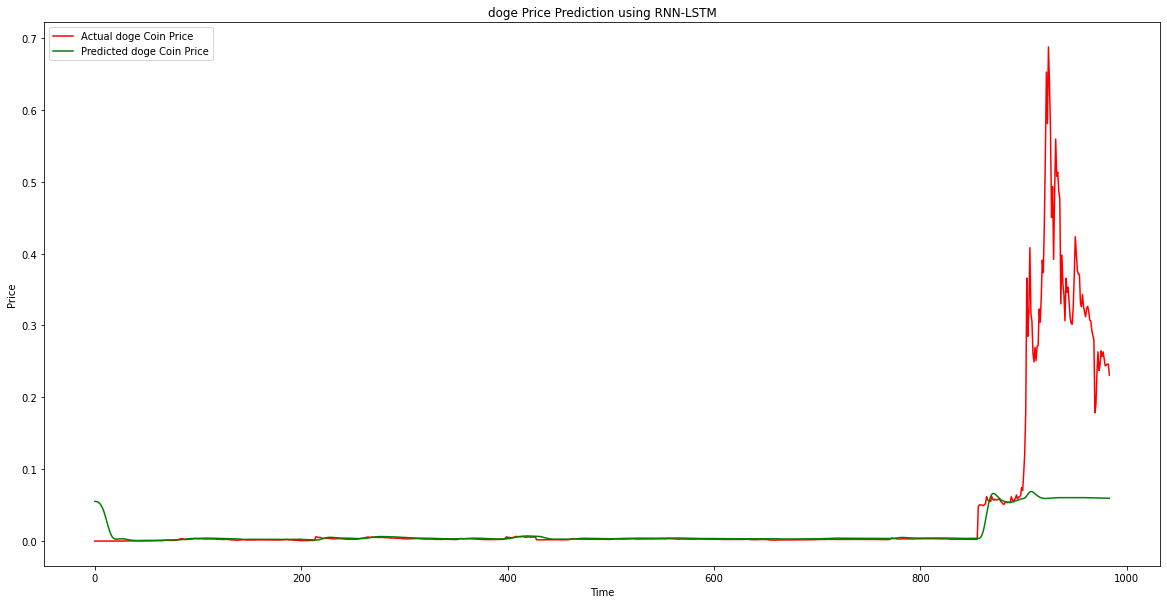

Mean Squared Error (MSE):  0.011026850151590177
Mean Absolute Error (MAE):  0.038331051894590684
Root Mean Squared Error (RMSE):  0.10500880987607743
R-squared (R2):  -1068.800147744627
Correlation:  0.8086114805891638


In [5]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

# Load the dataset
data = pd.read_csv('coin_Dogecoin.csv')

# Filter for Binance Coin data only
doge = data[data['Name']=='Dogecoin'].copy()

# Split data into training and test sets
doge_train = doge[doge['Date']<'2020-01-01'].copy()
doge_test = doge[doge['Date']>='2020-01-01'].copy()

# Filter for Open, Close, High, Low, and Volume columns for the training 
training_doge = doge_train[['Open', 'Close', 'High', 'Low', 'Volume']].copy()

# Normalize the training set
scaler = MinMaxScaler()
training_doge = scaler.fit_transform(training_doge)

# Create input and output sequences for the LSTM model
X_train = []
Y_train = []
for i in range(60, len(training_doge)):
  X_train.append(training_doge[i-60:i])
  Y_train.append(training_doge[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the LSTM model
model.fit(X_train, Y_train, epochs = 30, batch_size =50)

# Create input and output sequences for testing the model
past = doge_train.tail(60)
past_doge_df = past.append(doge_test, ignore_index=True)
testing_doge = past_doge_df[['Open', 'Close', 'High', 'Low', 'Volume']].copy()
testing_doge = scaler.transform(testing_doge)
X_test = []
Y_test = []
for i in range(60, len(testing_doge)):
  X_test.append(testing_doge[i-60:i])
  Y_test.append(testing_doge[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)

# Make predictions using the LSTM model
Y_pred = model.predict(X_test)

# Rescale the predicted and actual prices
scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

# Plot the predicted and actual prices
plt.figure(figsize=(20,10))
plt.plot(Y_test, color = 'red', label = 'Actual doge Coin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted doge Coin Price')
plt.title('doge Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate metrics
mse = np.mean((Y_pred - Y_test)**2)
mae = np.mean(np.abs(Y_pred - Y_test))
rmse = np.sqrt(mse)
r2 = 1 - np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2)

# Print metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)

# Calculate correlation between predicted and actual prices
corr = np.corrcoef(Y_pred.reshape(-1), Y_test.reshape(-1))[0][1]

# Print correlation
print("Correlation: ", corr)

### **LSTM model on Ethereum Coin price data**

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_26 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_21 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_27 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_22 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_28 (LSTM)              (None, 60, 50)           

C:\Users\sahmed\AppData\Local\Temp\ipykernel_7356\3800499838.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  past_eth_df = past.append(eth_test, ignore_index=True)


31/31 [==============================] - 2s 23ms/step


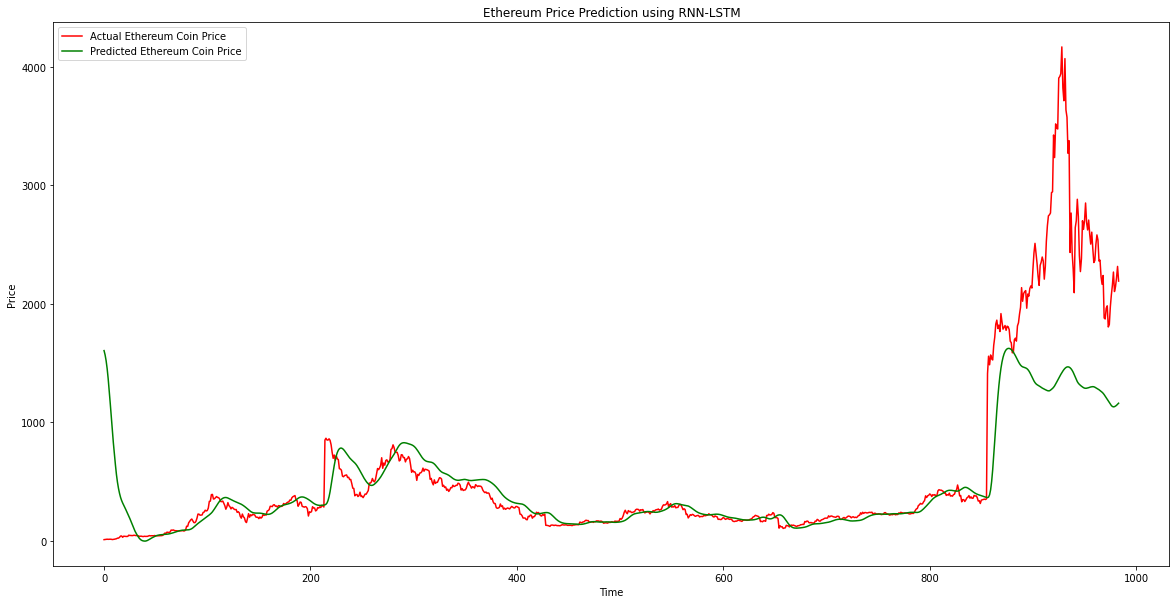

Mean Squared Error (MSE):  729668.9177069385
Mean Absolute Error (MAE):  514.5929465370173
Root Mean Squared Error (RMSE):  854.206601301429
R-squared (R2):  -1276.003066107659
Correlation:  0.8632849127639645


In [6]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

# Load the dataset
data = pd.read_csv('coin_Ethereum.csv')

# Filter for Binance Coin data only
eth = data[data['Name']=='Ethereum'].copy()

# Split data into training and test sets
eth_train = eth[eth['Date']<'2020-01-01'].copy()
eth_test = eth[eth['Date']>='2020-01-01'].copy()

# Filter for Open, Close, High, Low, and Volume columns for the training 
training_eth = eth_train[['Open', 'Close', 'High', 'Low', 'Volume']].copy()

# Normalize the training set
scaler = MinMaxScaler()
training_eth = scaler.fit_transform(training_eth)

# Create input and output sequences for the LSTM model
X_train = []
Y_train = []
for i in range(60, len(training_eth)):
  X_train.append(training_eth[i-60:i])
  Y_train.append(training_eth[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the LSTM model
model.fit(X_train, Y_train, epochs = 30, batch_size =50)

# Create input and output sequences for testing the model
past = eth_train.tail(60)
past_eth_df = past.append(eth_test, ignore_index=True)
testing_eth = past_eth_df[['Open', 'Close', 'High', 'Low', 'Volume']].copy()
testing_eth = scaler.transform(testing_eth)
X_test = []
Y_test = []
for i in range(60, len(testing_eth)):
  X_test.append(testing_eth[i-60:i])
  Y_test.append(testing_eth[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)

# Make predictions using the LSTM model
Y_pred = model.predict(X_test)

# Rescale the predicted and actual prices
scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

# Plot the predicted and actual prices
plt.figure(figsize=(20,10))
plt.plot(Y_test, color = 'red', label = 'Actual Ethereum Coin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Ethereum Coin Price')
plt.title('Ethereum Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate metrics
mse = np.mean((Y_pred - Y_test)**2)
mae = np.mean(np.abs(Y_pred - Y_test))
rmse = np.sqrt(mse)
r2 = 1 - np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2)

# Print metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)

# Calculate correlation between predicted and actual prices
corr = np.corrcoef(Y_pred.reshape(-1), Y_test.reshape(-1))[0][1]

# Print correlation
print("Correlation: ", corr)

### **LSTM model on Litecoin Coin price data**

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 60, 50)            11200     
                                                                 
 dropout_24 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_31 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_25 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_32 (LSTM)              (None, 60, 50)            20200     
                                                                 
 dropout_26 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_33 (LSTM)              (None, 60, 50)           

C:\Users\sahmed\AppData\Local\Temp\ipykernel_7356\1381135452.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  past_ltc_df = past.append(ltc_test, ignore_index=True)


31/31 [==============================] - 2s 27ms/step


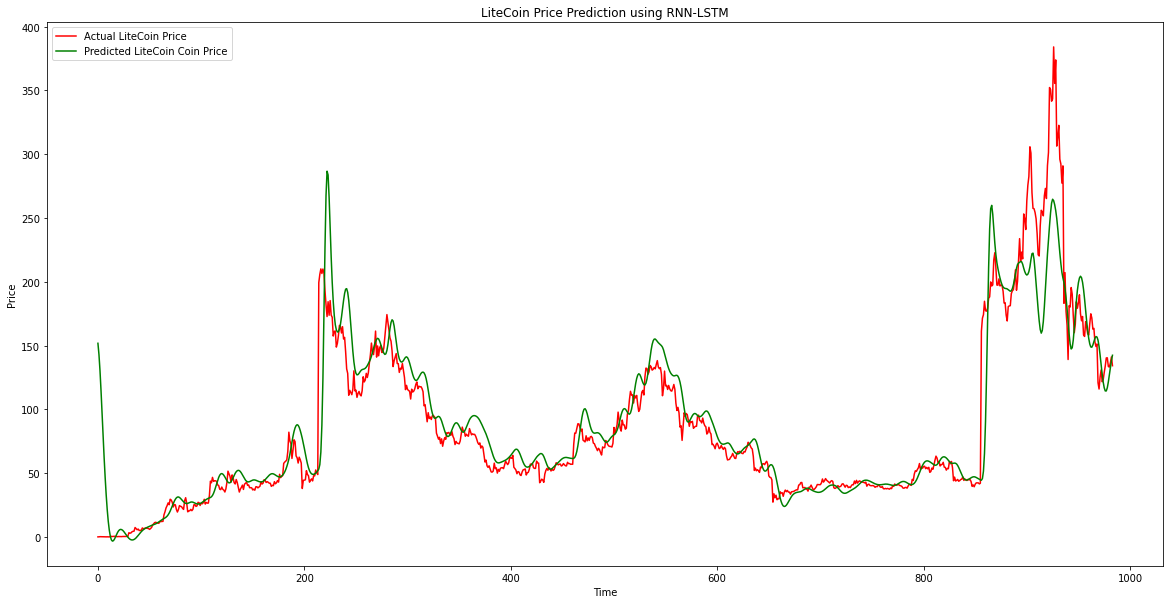

Mean Squared Error (MSE):  7661.122818366431
Mean Absolute Error (MAE):  65.20990238549751
Root Mean Squared Error (RMSE):  87.52784024735462
R-squared (R2):  -1794.5212770237383
Correlation:  0.9155179039082745


In [7]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model

import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

# Load the dataset
data = pd.read_csv('coin_Litecoin.csv')

# Filter for Binance Coin data only
ltc = data[data['Name']=='Litecoin'].copy()

# Split data into training and test sets
ltc_train = ltc[ltc['Date']<'2020-01-01'].copy()
ltc_test = ltc[ltc['Date']>='2020-01-01'].copy()

# Filter for Open, Close, High, Low, and Volume columns for the training 
training_ltc = ltc_train[['Open', 'Close', 'High', 'Low', 'Volume']].copy()

# Normalize the training set
scaler = MinMaxScaler()
training_ltc = scaler.fit_transform(training_ltc)

# Create input and output sequences for the LSTM model
X_train = []
Y_train = []
for i in range(60, len(training_ltc)):
  X_train.append(training_ltc[i-60:i])
  Y_train.append(training_ltc[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))
model.summary()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the LSTM model
model.fit(X_train, Y_train, epochs = 30, batch_size =50)

# Create input and output sequences for testing the model
past = ltc_train.tail(60)
past_ltc_df = past.append(ltc_test, ignore_index=True)
testing_ltc = past_ltc_df[['Open', 'Close', 'High', 'Low', 'Volume']].copy()
testing_ltc = scaler.transform(testing_ltc)
X_test = []
Y_test = []
for i in range(60, len(testing_ltc)):
  X_test.append(testing_ltc[i-60:i])
  Y_test.append(testing_ltc[i,0])
X_test, Y_test = np.array(X_test), np.array(Y_test)

# Make predictions using the LSTM model
Y_pred = model.predict(X_test)

# Rescale the predicted and actual prices
scale = 1/scaler.scale_[0]
Y_test = Y_test*scale
Y_pred = Y_pred*scale

# Plot the predicted and actual prices
plt.figure(figsize=(20,10))
plt.plot(Y_test, color = 'red', label = 'Actual LiteCoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted LiteCoin Coin Price')
plt.title('LiteCoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate metrics
mse = np.mean((Y_pred - Y_test)**2)
mae = np.mean(np.abs(Y_pred - Y_test))
rmse = np.sqrt(mse)
r2 = 1 - np.sum((Y_test - Y_pred)**2) / np.sum((Y_test - np.mean(Y_test))**2)

# Print metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R2): ", r2)

# Calculate correlation between predicted and actual prices
corr = np.corrcoef(Y_pred.reshape(-1), Y_test.reshape(-1))[0][1]

# Print correlation
print("Correlation: ", corr)